# Setup of Supervised Learning Setup

<div style="border: 2px solid #4CAF50; border-radius: 8px; padding: 10px; background-color: #e8f5e9; color: #2e7d32;">
<b>Goal</b> <br>
Given labeled examples, find the  <b>prediction</b> of an unlabeled example
</div><br><br>

---

| **Applications: Examples**                | **Task Description**                                                                                                                                        | **Traditional Approach**                                                                                                                    | **Machine Learning Approach**                                                                                          |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **Email Spam Filtering**       | <span style="color:blue;">Classify an email as spam or not-spam.</span>                                                                                      | - Write manual rules to classify emails. <br> **Drawbacks**: <br> &emsp; - Rules need constant updates. <br> &emsp; - Vulnerable to spammers’ tricks. <br> &emsp; - Limited generalizability across languages. | - Learn a classifier from historical data (e.g., user-labeled spam vs. not-spam emails).                              |
| **Web-Search Ranking**         | <span style="color:blue;">Predict which webpage a user will click based on their query.</span>                                                               | - Rank pages manually or use heuristic-based rules.                                                                                         | - Predict user behavior and preferences by training on historical click-through data.                                 |
| **Online Advertisement Placement** | <span style="color:blue;">Predict ad revenue based on user behavior.</span>                                                                                   | - Assign advertisements based on static rules or predefined criteria.                                                                      | - Predict ad revenue by learning from user profiles, browsing history, and past ad performance.                       |
| **Visual Object Recognition**  | <span style="color:blue;">Predict objects in an image (e.g., for self-driving cars).</span>                                                                  | - Manually define features or rules for detecting objects.                                                                                  | - Learn features directly from labeled image datasets (e.g., car, pedestrian, traffic signs).                         |
| **Face Detection**             | <span style="color:blue;">Detect if an image patch contains a human face.</span>                                                                             | - Use manually defined geometric rules (e.g., ratios of facial features).                                                                   | - Automatically detect faces by training on labeled face/non-face image datasets.                                     |


---

<div style="border: 2px solid #4CAF50; border-radius: 8px; padding: 10px; background-color: #e8f5e9; color: #2e7d32;">
<b>Training Data</b> <br>


Training data consists of **pairs** of inputs $(\mathbf{x}, y)$:
- $\mathbf{x} \in \textcolor{blue}{\mathbb{R}^d}$: **Features(Input)**.
- $y$:                **Label (Output)**.

  
The training data is denoted as:
$$
D = \{\textcolor{teal}{(\mathbf{x}_1, y_1)}, \ldots, \textcolor{teal}{(\mathbf{x}_n, y_n)}\} \subseteq \textcolor{blue}{\mathbb{R}^d} \times \textcolor{purple}{\mathcal{C}}
$$

- $\mathbf{x}$: The **features** (input variables) that describe each data instance.
- $y$: The **output** or label associated with each data instance.
- $\mathbb{R}^d$: The **$d$-dimensional feature space**, where each feature vector $\mathbf{x} \in \mathbb{R}^d$ resides.
- $\mathcal{C}$: The **label space**, which represents the set of possible output labels.
- $\subseteq$: The **subset or identical set** notation. If $A \subseteq B$, it indicates that every element of set $A$ is also an element of set $B$, or $A$ is identical to $B$.
</div><br><br>



<div style="border: 1px solid #ff4d4d; background-color: #ffe6e6; padding: 10px; border-radius: 5px; font-size: 14px;">
  <b style="color: #cc0000;">Why Training Data Should Be Obtained from the Same Distribution as Deployment Data?</b>
  <p>
    If training data does not match the deployment data distribution, the model will fail to generalize and perform poorly in real-world scenarios.
  </p>
  <b>Example:</b>
  <p>
    Nokia's face recognition system trained primarily on European facial data struggled to recognize faces from Asian and African demographics when deployed globally. This mismatch in data distributions led to biased and inaccurate results, highlighting the importance of aligning training data with the intended deployment environment.
  </p>
</div>



<br><br>


<div style="border: 1px solid #add8e6; background-color: #f0f8ff; padding: 10px; border-radius: 5px; font-size: 14px;">
  <b>Key Assumptions</b><br>
  The data points \( (\mathbf{x}_i, y_i) \) are drawn from some (unknown) distribution \( \mathcal{P}(X, Y) \). <br>
  \( (\mathbf{x}_i, y_i) \sim \mathcal{P} \) <br>
  <b>Examples:</b>
  <ul>
    <li>We collect MRI scans of people, resulting in a distribution of MRI scans. This distribution is <b>unknown</b> (some unknown distribution from mother nature).</li>
    <li>Collecting pictures of people.</li>
  </ul>
</div>

<br>
The data can be either i.i.d or non-i.i.d <br>
<div style="background-color: #dfffd6; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
  <table style="width: 100%; border-collapse: collapse; text-align: left; background-color: #dfffd6;">
    <thead>
      <tr>
        <th style="border-bottom: 2px solid #ddd; padding: 8px; font-weight: bold;">i.i.d. Data</th>
        <th style="border-bottom: 2px solid #ddd; padding: 8px; font-weight: bold;">Non-i.i.d. Data</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Data points are independent and identically distributed.<br><br>(x, y are all drawn from the same distribution P, and knowing one data point will not tell us anything about the other data points)</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Data points exhibit dependencies or are not identically distributed.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Each observation is independent of all others.</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Observations may be dependent on each other (e.g., temporal, spatial).</td>
      </tr>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">All observations are drawn from the same probability distribution.</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Observations may come from different distributions or exhibit structured variation.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Example: Random sampling from a population (e.g., rolling a die, flipping a coin).</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Example: Time series data, spatial data, panel data, network data.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Suitable for simple machine learning models, statistical tests assuming independence.</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Suitable for time series forecasting, spatial analysis, hierarchical models.</td>
      </tr>
      <tr>
        <td style="padding: 8px;">Assumes no interaction or correlation between observations.</td>
        <td style="padding: 8px;">Assumes correlation, dependence, or structure within the data.</td>
      </tr>
    </tbody>
  </table>
</div>



---

Examples of Label Spaces:

<div style="background-color: #fffacd; border: 1px solid #ccc; padding: 10px; border-radius: 5px;">
  <table style="width: 100%; border-collapse: collapse; text-align: left; background-color: #fffacd;">
    <thead>
      <tr>
        <th style="border-bottom: 2px solid #ddd; padding: 8px; font-weight: bold;">Type</th>
        <th style="border-bottom: 2px solid #ddd; padding: 8px; font-weight: bold;">Label Space</th>
        <th style="border-bottom: 2px solid #ddd; padding: 8px; font-weight: bold;">Example</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Binary Classification</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">$\mathcal{C} = \{0, 1\}$ or $\{-1, +1\}$</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Spam Filtering: spam = $+1$, not = $-1$</td>
      </tr>
      <tr>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Multi-Class Classification</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">$\mathcal{C} = \{1, 2, \ldots, K\}$</td>
        <td style="padding: 8px; border-bottom: 1px solid #ddd;">Face Classification: 1 = "Obama", 2 = "Bush", etc.</td>
      </tr>
      <tr>
        <td style="padding: 8px;">Regression</td>
        <td style="padding: 8px;">$\mathcal{C} = \mathbb{R}$</td>
        <td style="padding: 8px;">Predict temperature or person's height</td>
      </tr>
    </tbody>
  </table>
</div>

---

Examples of Feature Vectors:

                                        |

---
| **Type**                | **Representation**                                                                                                         | **Features**                                                                                                      | **Examples**                                                                                           | **Concept Used**                                                                                      |
|-------------------------|-----------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **Patient Data (Hospital)** | $\mathbf{x}_i = \begin{bmatrix} x^1_i \\ x^2_i \\ \vdots \\ x^d_i \end{bmatrix}$                                           | $x^1_i$: gender  <br> $x^2_i$: height (cm)  <br> $x^3_i$: age (years)                                              | $\mathbf{x}_i = \begin{bmatrix} 1 \\ 62 \\ 183 \\ \vdots \end{bmatrix}$ <br> <br> (e.g., male (Yes/No), 62 years, 183 cm)  | Structured feature representation for numerical and categorical patient data.                          |
| **Text Documents**       | $\mathbf{x}_i = \begin{bmatrix} x^1_i \\ x^2_i \\ \vdots \\ x^d_i \end{bmatrix}$ <br> <br> $\mathbf{x}_i \in \mathbb{R}^d$, <br><br>  where $d$ is the number of words in the English language. | $x^\alpha_i$: occurrences of the $\alpha$-th word in the dictionary  <br> (e.g., term frequencies)                | $\mathbf{x}_i = \begin{bmatrix} \vdots \\ 7 \\ \vdots \\ 0 \end{bmatrix}$ <br> <br> (e.g., "ant": 7, "zebra": 0 (ant frequency of occurrence (occured 7 times) , and zebra freq. of occ.=0)) | <b>Bag of Words (BoW)</b>: Represents text as a fixed-length vector based on word frequency in a predefined vocabulary. **Only word frequency is considered; word order is ignored.** |
| **Images**               | $\mathbf{x}_i = \begin{bmatrix} x^1_i \\ x^2_i \\ \vdots \\ x^{3k}_i \end{bmatrix}$                                         | $x^{3j-2}_i$: Red value of the $j$-th pixel  <br> $x^{3j-1}_i$: Green value of the $j$-th pixel  <br> $x^{3j}_i$: Blue value of the $j$-th pixel | $\mathbf{x}_i = \begin{bmatrix} R_1 \\ G_1 \\ B_1 \\ R_2 \\ G_2 \\ B_2 \\ \vdots \end{bmatrix}$<br> <br>  (e.g., RGB values for pixels) | Pixel intensity representation for image data.                                                         |

---
<b> Loss Functions  :</b>

There are typically two steps involved in learning a hypothesis function $h()$. <br><br>First, we select the type of machine learning algorithm that we think is appropriate for this particular learning problem. This defines the hypothesis class $\mathcal{H}$, i.e., the set of functions we can possibly learn. The second step is to find the best function within this class, $h \in \mathcal{H}$. <br><br>This second step is the actual learning process and often, but not always, involves an optimization problem. Essentially, we try to find a function $h$ within the hypothesis class that makes the fewest mistakes within our training data. (If there is not a single function, we typically try to choose the "simplest" by some notion of simplicity - but we will cover this in more detail in a later class.)

<b> How can we find the best function? </b> <br>For this, we need some way to evaluate what it means for one function to be better than another. This is where the loss function (also called the risk function) comes in. A loss function evaluates a hypothesis $h \in \mathcal{H}$ on our training data and tells us how bad it is. The higher the loss, the worse it is. A loss of zero means it makes perfect predictions. It is common practice to normalize the loss by the total number of training samples, $n$, so that the output can be interpreted as the average loss per sample (and is independent of $n$).

Examples:

| **Loss Function**         | **Description**                                                                                             | **Mathematical Formula**                                                                                                                                                               | **Explanation in Colloquial English**                                                                                                                                                 | **Use Cases** |
|---------------------------|-------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|
| **Zero-One Loss**          | The simplest loss function is the zero-one loss. It literally counts how many mistakes a hypothesis function $h$ makes on the training set. For every single example, it suffers a loss of 1 if it is mispredicted, and 0 otherwise. The normalized zero-one loss returns the fraction of misclassified training samples, also often referred to as the training error. The zero-one loss is often used to evaluate classifiers in multi-class/binary classification settings but rarely useful to guide optimization procedures because the function is non-differentiable and non-continuous. | $$ \mathcal{L}_{0/1}(h) = \frac{1}{n} \sum_{i=1}^n \delta\left( h(\mathbf{x}_i) \neq y_i \right), \quad \text{where} \quad \delta\left( a \right) = \begin{cases} 1, & \text{if } h(\mathbf{x}_i) \neq y_i \\ 0, & \text{otherwise} \end{cases} $$ | This loss function returns the error rate on this data set $D$. For every example that the classifier misclassifies (i.e., gets wrong), a loss of 1 is suffered, whereas correctly classified samples lead to 0 loss. | Used in classification tasks, especially when the goal is simply to count misclassifications, such as in binary or multi-class classification problems. This loss is simple but not differentiable, which makes it difficult to optimize directly. |
| **Squared Loss**           | The squared loss function is typically used in regression settings. It iterates over all training samples and suffers the loss $(h(\mathbf{x}_i) - y_i)^2$. The squaring has two effects: 1., the loss suffered is always nonnegative; 2., the loss suffered grows quadratically with the absolute mispredicted amount. The latter property encourages no predictions to be really far off (or the penalty would be so large that a different hypothesis function is likely better suited). On the flip side, if a prediction is very close to be correct, the square will be tiny and little attention will be given to that example to obtain zero error. For example, if $|h(\mathbf{x}_i) - y_i| = 0.001$ the squared loss will be even smaller, $0.000001$, and will likely never be fully corrected. If, given an input $\mathbf{x}$, the label $y$ is probabilistic according to some distribution $P(y|\mathbf{x})$ then the optimal prediction to minimize the squared loss is to predict the expected value, i.e. $h(\mathbf{x}) = \mathbb{E}_{P(y|\mathbf{x})}[y]$. | $$ \mathcal{L}_\text{sq}(h) = \frac{1}{n} \sum_{i=1}^n (h(\mathbf{x}_i) - y_i)^2 $$ | The squaring has two effects: first, the loss is always non-negative, and second, the penalty increases quadratically as the error grows. This property is useful because it discourages large mispredictions and focuses on getting those predictions right. | Commonly used in regression tasks such as predicting house prices or temperatures. Squaring the error is beneficial as it focuses on minimizing larger errors, which often leads to a better fit and smoother predictions. |
| **Absolute Loss**          | Similar to the squared loss, the absolute loss function is also typically used in regression settings. It suffers the penalties $|h(\mathbf{x}_i) - y_i|$. Because the suffered loss grows linearly with the mispredictions it is more suitable for noisy data (when some mispredictions are unavoidable and shouldn’t dominate the loss). If, given an input $\mathbf{x}$, the label $y$ is probabilistic according to some distribution $P(y|\mathbf{x})$ then the optimal prediction to minimize the absolute loss is to predict the median value, i.e. $h(\mathbf{x}) = \text{MEDIAN}_{P(y|\mathbf{x})}[y]$. | $$ \mathcal{L}_\text{abs}(h) = \frac{1}{n} \sum_{i=1}^n |h(\mathbf{x}_i) - y_i| $$ | Because the loss grows linearly with mispredictions, it doesn’t penalize large errors as much as squared loss. It’s more robust in situations where there is noisy data or when mispredictions are unavoidable. | Used in regression when there is noise in the data and you want to avoid letting extreme outliers unduly affect the model, such as in financial predictions or robust modeling. |
| **Logarithmic Loss**       | Used for binary classification problems, evaluates how well the predicted probabilities match the true labels. | $$ \mathcal{L}_\text{log}(h) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(h(\mathbf{x}_i)) + (1 - y_i) \log(1 - h(\mathbf{x}_i)) \right) $$                                            | This formula is used when the output is a probability, as in binary classification. It penalizes predictions based on how far off the predicted probability is from the actual class label. | Commonly used in binary classification tasks such as spam detection, medical diagnoses, and other tasks involving probability-based predictions. Logarithmic loss is effective because it maximizes the likelihood of the correct class, and thus works well when predicting probabilities rather than hard labels. |
| **Hinge Loss**             | Used for classification tasks, particularly with support vector machines, penalizes misclassifications and allows for margin of error. | $$ \mathcal{L}_\text{hinge}(h) = \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i h(\mathbf{x}_i)) $$                                        | The hinge loss is commonly used in classification models like support vector machines. It penalizes predictions that are on the wrong side of the decision boundary, but allows for some margin of error. | Used in classification tasks, particularly with support vector machines (SVMs) for binary or multi-class classification, such as text classification or image classification. Hinge loss is useful because it enforces a margin of error, promoting a larger gap between classes and improving generalization. |
<br><br>
--- 


<div style="border: 1px solid #ff0000; background-color: #ffe5e5; padding: 10px; border-radius: 5px; font-size: 14px;">
<b>Objective of Supervised Learning:</b><br>
Use the training data to learn a function $h$ that goes from $\mathbf{x}_i$ to $\mathbf{y}_i$. <br><br>
Ultimately, we aim to learn a function $h$ such that for a new pair $(\mathbf{x}, y) \sim \mathcal{P}$: <br>
$$h(\mathbf{x}) = y$$<br>
with high probability (or $h(\mathbf{x}) \approx y$).
</div>

<br><br>
| **Dense Feature Vector**                                                                                          | **Sparse Feature Vector**                                                                                          |
|-------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| Most of the elements have non-zero or meaningful values.                                                          | Most of the elements are zero, with only a few non-zero values.                                                   |
| Example:                                                                                                          | Example:                                                                                                          |
| $$\mathbf{x} = \begin{bmatrix} 0.12 \\ 0.34 \\ 0.67 \\ 0.89 \\ \vdots \\ 0.45 \end{bmatrix}$$                     | $$\mathbf{x} = \begin{bmatrix} 0 \\ 0 \\ 3 \\ 0 \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix}$$                     |
| Image pixels (e.g., from MNIST dataset) where almost all pixel values contribute meaningfully.                    | Bag-of-words representation for text where non-zero values indicate word counts in a high-dimensional space.      |



### Algorithms

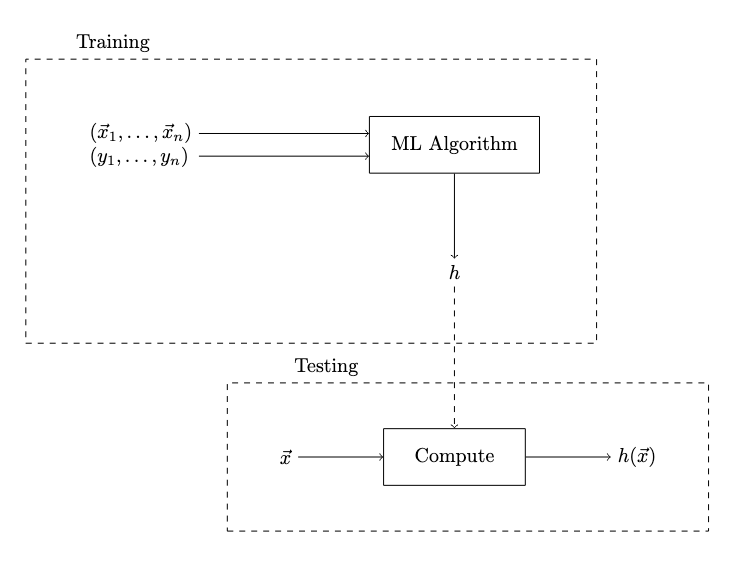

<div style="border: 2px solid #4CAF50; border-radius: 8px; padding: 10px; background-color: #e8f5e9; color: #2e7d32;">
<b> Hypothesis classes and No Free Lunch </b> <br><br><br>
Before we can find a function <b>$h$</b>, <br> we must specify what type of function it is that we are looking for. It could be an artificial neural network, a decision tree or many other types of classifiers. We call the set of possible functions the <b> Hypothesis class</b>. By specifying the hypothesis class, we are encoding important assumptions about the type of problem we are trying to learn. The <b> No Free Lunch Theorem </b> states that every successful ML algorithm must make assumptions. This also means that there is no single ML algorithm that works for every setting.
</div><br><br>

$$h  \in \mathcal{H}$$<br>
$$\text{where} \mathcal{H} \text{is the Hypothesis Class}$$

<br>
<b> What the M.L Algorithm does(Learning): </b><br> Out of an infinelty many functions that it could learn, it picks the best $h$

<div style="border: 2px solid red; background-color: #f8d7da; padding: 10px; border-radius: 5px;">
    <strong>How to find the optimal $h$?</strong><br>
    - Use Loss Functions.
</div>

<div style="border: 2px solid red; background-color: #f8d7da; padding: 10px; border-radius: 5px;">

<strong>GENERALIZATION :</strong>

We aim to find a function $h$ from a set of all functions $\mathcal{H}$, such that:

<p style="color:blue;">$h \in \mathcal{H} \quad \text{such that } \forall (x, y) \sim \mathcal{P}, \; h(x) \approx y$</p>

This means we want a function $h$ such that any $x$ and $y$ drawn from the distribution $\mathcal{P}$ satisfies $h(x) \approx y$.

---

Given our function $h$, what loss would we expect to find if we apply it to a new dataset, assuming the data is from the same distribution?

<p style="color:purple;">$\mathbb{E}_{(x, y) \sim \mathcal{P}} \big[ L(h; (x, y)) \big]$</p>

---

<div style="border: 2px solid orange; background-color: #fff3cd; padding: 10px; border-radius: 5px;">
<strong>Important Concept:</strong>

Ideally, we would like to minimize the expected loss:

<p style="color:purple;">$\mathbb{E}_{(x, y) \sim \mathcal{P}} \big[ L(h; (x, y)) \big]$</p>

However, we **do not have access** to the true distribution $\mathcal{P}$, which governs the relationship between inputs $x$ and outputs $y$.  
Instead, we work with a finite dataset sampled from $\mathcal{P}$. This is why **generalization** is critical in machine learning:  
We need to ensure that the function $h$ performs well not just on the training data, but also on unseen data that comes from the same distribution $\mathcal{P}$.

</div>

---

<div style="border: 2px solid green; background-color: #d4edda; padding: 10px; border-radius: 5px;">
<strong>Practical Approach:</strong>

Since we cannot compute $\mathbb{E}_{(x, y) \sim \mathcal{P}} \big[ L(h; (x, y)) \big]$ directly (as we lack access to $\mathcal{P}$), we estimate it using a **test-train split**.

1. **Split the data** into:
   - **Training set ($D_{\text{TR}}$):** Used to train the function $h$.
   - **Testing set ($D_{\text{TE}}$):** Used to evaluate $h$ on unseen data.

2. **Compute the empirical average of the loss** on the testing set to approximate the true expected loss:

<p style="color:blue;">$\hat{\mathbb{E}}_{(x, y) \in D_{\text{TE}}} \big[ L(h; (x, y)) \big]$</p>

This empirical loss on the testing set serves as an estimate of the generalization error.  
By testing on unseen data, we simulate the performance of $h$ on the true distribution $\mathcal{P}$.

</div>

---

**Explanation of Terms in the Expectation Equation:**

1. **$\mathbb{E}$:**
   - **Math Definition:** The expectation operator, which calculates the average value of a random variable under a probability distribution.
   - **Colloquial English:** Think of it as the "average" or "expected" value when you sample data points repeatedly from the same distribution.

2. **$(x, y) \sim \mathcal{P}$:**
   - **Math Definition:** The pair of data points $(x, y)$ are sampled from the probability distribution $\mathcal{P}$.
   - **Colloquial English:** This means that the inputs $x$ (features) and outputs $y$ (labels) are generated by the same underlying process or pattern (distribution) $\mathcal{P}$.

3. **$L(h; (x, y))$:**
   - **Math Definition:** The loss function $L$ measures how far off the prediction $h(x)$ is from the actual value $y$, for the function $h$ applied to input $x$.
   - **Colloquial English:** This is how much the prediction made by the model $h$ "misses the mark" when compared to the true answer $y$. It tells us how bad the prediction is for one data point.

4. **$\mathbb{E}_{(x, y) \sim \mathcal{P}} \big[ L(h; (x, y)) \big]$:**
   - **Math Definition:** The expected loss is the average value of the loss function $L(h; (x, y))$, calculated over all possible data points $(x, y)$ sampled from the distribution $\mathcal{P}$.
   - **Colloquial English:** This is the average error you'd expect the model $h$ to make if you tested it on an infinite number of new data points drawn from the same underlying process $\mathcal{P}$.

**Why is this Important?**  
This equation tells us how good a model $h$ is in the long run, not just on the training data. Since we don't know $\mathcal{P}$ (the true distribution), we approximate this using finite datasets and assume they come from $\mathcal{P}$.

---

The best function $h$ will find the solution by minimizing the loss:

<p style="color:green;">$h = \arg\min_{h \in \mathcal{H}} L(h)$</p>

</div>

<div style="border: 2px solid green; background-color: #d4edda; padding: 10px; border-radius: 5px;">
<strong>Estimating Generalization Error:</strong>

Since we cannot compute $\mathbb{E}_{(x, y) \sim \mathcal{P}} \big[ L(h; (x, y)) \big]$ directly (as we lack access to $\mathcal{P}$), we estimate it using a **test-train split**.

1. **Split the data** into:
   - **Training set ($D_{\text{TR}}$):** Used to train the function $h$.
   - **Testing set ($D_{\text{TE}}$):** Used to evaluate $h$ on unseen data.

2. **Compute the empirical average of the loss** on the testing set to approximate the true expected loss:

<p style="color:blue;">$\hat{\mathbb{E}}_{(x, y) \in D_{\text{TE}}} \big[ L(h; (x, y)) \big]$</p>

This empirical loss on the testing set serves as an estimate of the generalization error.  
By testing on unseen data, we simulate the performance of $h$ on the true distribution $\mathcal{P}$.

</div>

<div style="border: 2px solid red; background-color: #f8d7da; padding: 10px; border-radius: 5px;">

<strong>Estimating Generalization Error in Machine Learning:</strong>

In machine learning, the **generalization error** measures how well a model performs on unseen data. Since we cannot compute the true expected loss directly (as we lack access to the true data distribution $\mathcal{P}$), we estimate it using finite datasets.

---

<div style="border: 2px solid green; background-color: #d4edda; padding: 10px; border-radius: 5px;">
<strong>Practical Approach to Estimate Generalization Error:</strong>

1. **Split the Data:**
   - Divide the dataset $D$ into:
     - **Training set ($D_{\text{TR}}$):** Used to train the model $h$.
     - **Testing set ($D_{\text{TE}}$):** Used to evaluate the model on unseen data.

2. **Train the Model:** Use $D_{\text{TR}}$ to train the function $h$ by minimizing the training loss.

3. **Evaluate on Testing Set:** Compute the average loss on $D_{\text{TE}}$ to estimate the generalization error:

   <p style="color:blue;">$\hat{\mathbb{E}}_{(x, y) \in D_{\text{TE}}} \big[ L(h; (x, y)) \big]$</p>

   This represents the empirical generalization error based on the test data.

---

**Key Considerations:**

- **Overfitting:** A model may perform well on $D_{\text{TR}}$ but poorly on $D_{\text{TE}}$. This indicates poor generalization.
- **Cross-Validation:** To get a more reliable estimate of the generalization error, use $k$-fold cross-validation. Split the data into $k$ subsets and evaluate the model on multiple testing sets.

**Equation for Cross-Validation Estimate:**
<p style="color:purple;">$\hat{\mathbb{E}} \big[ L(h; (x, y)) \big] = \frac{1}{k} \sum_{i=1}^k \hat{\mathbb{E}}_{(x, y) \in D_{\text{TE}, i}} \big[ L(h; (x, y)) \big]$</p>

- Here, $D_{\text{TE}, i}$ represents the testing set for the $i$-th fold, and $k$ is the number of folds.

4. **Bias-Variance Tradeoff:** The generalization error is affected by:
   - **Bias:** Error due to incorrect assumptions in the learning algorithm.
   - **Variance:** Error due to sensitivity to small fluctuations in the training set.
   - The goal is to balance bias and variance to minimize the generalization error.

5. **Model Selection:** Use the validation set $D_{\text{VA}}$ to tune hyperparameters and select the best model. Afterward, evaluate the final model on $D_{\text{TE}}$ to estimate the true generalization error.

---

**Why Generalization Error Matters:**  
The generalization error reflects how well a model can predict outputs for unseen data. Minimizing this error is the ultimate goal of machine learning because it ensures the model's performance is not limited to just the training dataset.

</div>

<div style="border: 2px solid red; background-color: #f8d7da; padding: 10px; border-radius: 5px;">

<strong>GENERALIZATION :</strong>

Given a loss function, we can attempt to find the function $h$ that minimizes the loss:

<p style="color:blue;">$$
h = \arg\min_{h \in \mathcal{H}} \mathcal{L}(h)
$$</p>

A significant part of machine learning focuses on the question: **How do we minimize this efficiently?**

If you find a function $h(\cdot)$ with low loss on your data $D$, how do you know whether it will still perform well on examples not in $D$?

Bad example: **"memorizer"** $h(\cdot)$

<p style="color:red;">$$
h(x) =
\begin{cases} 
y_i, & \text{if } \exists (x_i, y_i) \in D \text{ such that } \mathbf{x} = \mathbf{x}_i, \\
0, & \text{otherwise.}
\end{cases}
$$</p>

For this $h(\cdot)$, we get **0% error** on the training data $D$, but it performs poorly with samples not in $D$, i.e., this function suffers from **overfitting**.

---

Train / Test splits:

To address the overfitting issue, we usually split $D$ into three subsets: 

- $D_{\text{TR}}$: the training data,  
- $D_{\text{VA}}$: the validation data, and  
- $D_{\text{TE}}$: the test data.  

Typically, these are split in proportions of 80%, 10%, and 10%. We choose $h(\cdot)$ based on $D_{\text{TR}}$ and evaluate $h(\cdot)$ on $D_{\text{TE}}$.

**Quiz:** Why do we need $D_{\text{VA}}$?

<p style="color:purple;">$D_{\text{VA}}$ is used to check whether the $h(\cdot)$ obtained from $D_{\text{TR}}$ suffers from overfitting.  
If the loss on $D_{\text{VA}}$ is too large, $h(\cdot)$ will be revised based on $D_{\text{TR}}$ and validated again on $D_{\text{VA}}$.  
This iterative process ensures low loss on $D_{\text{VA}}$.</p>

There is a trade-off between the sizes of $D_{\text{TR}}$ and $D_{\text{VA}}$:  
- Larger $D_{\text{TR}}$ improves training results.  
- Larger $D_{\text{VA}}$ makes validation more reliable (less noisy).

---

How to Split the Data?

It is critical to carefully split the data into Train, Validation, and Test sets. The test set must simulate a real test scenario. For instance:

- If training an email spam filter, train the system on past data to predict whether future emails are spam.  
- Ensure splits are made temporally if the data has a temporal component.  
- If no temporal component exists, split the data **uniformly at random**.

**Avoid improper splits:**
- Never split alphabetically or by feature values.

---

**Key Guidelines:**

1. **By time:** If the data is temporally collected, split train/test temporally.  
2. **Uniformly at random:** Only applicable if data is **i.i.d.**  

The **test error (testing loss)** approximates the true generalization error/loss.

---

Putting everything together:

We train our classifier by minimizing the training loss:

<p style="color:blue;">$$
\text{Learning: } h^*(\cdot) = \arg\min_{h(\cdot) \in \mathcal{H}} \frac{1}{|D_{\text{TR}}|} \sum_{(x, y) \in D_{\text{TR}}} \ell(x, y | h(\cdot)),
$$</p>

where $\mathcal{H}$ represents the set of all possible classifiers $h(\cdot)$. We aim to find a hypothesis $h$ that performs well on known/past data.

The classifier is evaluated on the testing loss:

<p style="color:green;">$$
\text{Evaluation: } \epsilon_{\text{TE}} = \frac{1}{|D_{\text{TE}}|} \sum_{(x, y) \in D_{\text{TE}}} \ell(x, y | h^*(\cdot)).
$$</p>

If the samples are i.i.d. from the same distribution $\mathcal{P}$, the testing loss is an unbiased estimator of the true generalization loss:

<p style="color:purple;">$$
\text{Generalization: } \epsilon = \mathbb{E}_{(x, y) \sim \mathcal{P}}[\ell(x, y | h^*(\cdot))].
$$</p>

**Quiz:** Why does $\epsilon_{\text{TE}} \to \epsilon$ as $|D_{\text{TE}}| \to +\infty$?  

This follows from the **weak law of large numbers**, stating that the empirical average of data drawn from a distribution converges to its mean.

---

**Key Insight:**
- **No Free Lunch:** Machine learning algorithms rely on assumptions about which hypothesis class $\mathcal{H}$ to choose.  
- These assumptions depend on the data and the underlying distribution $\mathcal{P}$.  
- No single hypothesis class $\mathcal{H}$ works for all problems.

---

Example:

Given points $(x_1, y_1) = (1, 1), (x_2, y_2) = (2, 2), (x_3, y_3) = (3, 3), (x_4, y_4) = (4, 4), (x_5, y_5) = (5, 5)$,  
**Question:** What is $y$ if $x = 2.5$?

**Answer:** Impossible to know without assumptions.  
The common assumption is that the function to be approximated is **locally smooth**.

</div>

<div style="font-family: Arial; font-size: 14px; line-height: 1.5;">
<b style="color: darkblue;">Key Idea:</b>  
Proper data splitting is essential in machine learning to evaluate models without bias. The dataset is divided into three parts: training, validation, and test sets. Careful splitting ensures generalizable results, avoiding pitfalls such as data leakage and overfitting.

---

<b style="color: green;">Steps for Data Splitting:</b>  
1. <b>Training Set (D<sub>train</sub>):</b> Used for model training. The model learns patterns and relationships between features and labels.  
2. <b>Validation Set (D<sub>val</sub>):</b> Helps in model selection and hyperparameter tuning, providing feedback for optimization.  
3. <b>Test Set (D<sub>test</sub>):</b> Offers an unbiased estimate of the model's performance on unseen data.  

---

<b style="color: crimson;">Important Principles for Splitting with Scientific Examples:</b>  

- <b>Temporal Data:</b> When data has a time-dependent structure (e.g., spam filtering, stock prices), it is crucial to split by time to avoid future information leaking into training.  
  - <b>Scientific Depth:</b> In spam filtering, emails often appear in clusters over time as spammers send the same message to multiple users. A random split might place nearly identical emails in both the training and test sets, artificially inflating performance metrics. To address this, split based on the temporal order of data collection, ensuring the model learns from past data to predict future events—a closer reflection of real-world deployment conditions.

- <b>i.i.d. Data:</b> For datasets assumed to be independent and identically distributed, random splitting is appropriate. However, ensure the splitting method does not introduce bias inadvertently.  
  - <b>Scientific Depth:</b> For example, if data points are stored sequentially by label (e.g., all samples of class "1" followed by class "0"), a naive split could result in one class being entirely in the test set. This would lead to a biased evaluation where the model has no exposure to certain classes during training. Random shuffling before splitting ensures all classes are proportionally represented in both sets, adhering to the i.i.d. assumption.

- <b>Grouped Data:</b> In datasets with inherent group structures (e.g., patient records, households), ensure entire groups are placed exclusively in training or testing.  
  - <b>Scientific Depth:</b> Patient data often includes multiple samples (e.g., MRI scans, blood tests) for the same individual. If such samples are split randomly, the model could indirectly "learn" about the test data by memorizing patient-specific patterns from the training set. This results in overestimation of model performance. Assigning entire patients to either training or testing prevents such leakage, ensuring the model generalizes to unseen individuals rather than memorizing intra-group similarities.

---

<b style="color: teal;">Overfitting on the Test Set:</b>  
Repeatedly evaluating multiple models on the test set introduces selection bias, as the final model is implicitly optimized on the test data.  
<b style="color: crimson;">Solution:</b>  
Introduce a validation set to guide model selection and reserve the test set for a single, final evaluation of generalization error.

<b>Scientific Example:</b>  
Consider testing a face recognition model on a dataset where the test set consists of 100 faces, and the model initially misclassifies 5. If the model is iteratively fine-tuned to correct these 5 misclassifications, its apparent error rate drops to 0%. However, this improvement is often due to overfitting on the specific test set, not genuine generalization. By introducing a validation set, the model can be refined without compromising the test set's role as an unbiased estimator.

---

<b style="color: darkorange;">Additional Notes:</b>  
- <b>Split Ratios:</b> A common split is 80% training, 10% validation, and 10% test.  
- <b>Small Datasets:</b> Techniques like leave-one-out cross-validation are useful for datasets with limited samples.  
- <b>Variance and Bias:</b> Larger test sets provide lower variance in error estimates but reduce the amount of data available for training.

<b>Scientific Example:</b>  
In small datasets, such as those involving rare diseases, every sample is valuable. Leave-one-out cross-validation ensures the model is trained on as much data as possible while providing an unbiased error estimate. For example, in an MRI-based diagnostic study with only 11 patients, the model can be trained on 10 patients and tested on the remaining one, repeating the process for all patients.

---

<b style="color: darkblue;">Key Takeaway:</b>  
Machine learning requires assumptions about the data, such as independence, temporal structure, or group-level organization. The success of an algorithm depends on its ability to leverage these assumptions effectively. No single algorithm works best for all scenarios, so understanding data properties is crucial for selecting the right model.
</div>